In [1]:
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt

In [2]:
from run import run_simulation
from utils.plot import plot_simulation

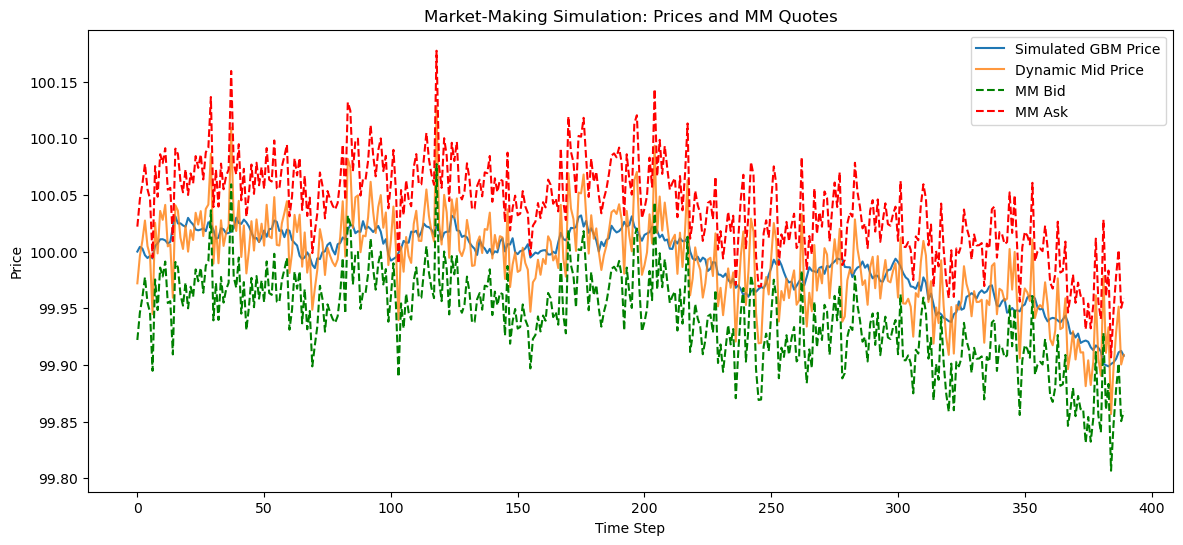

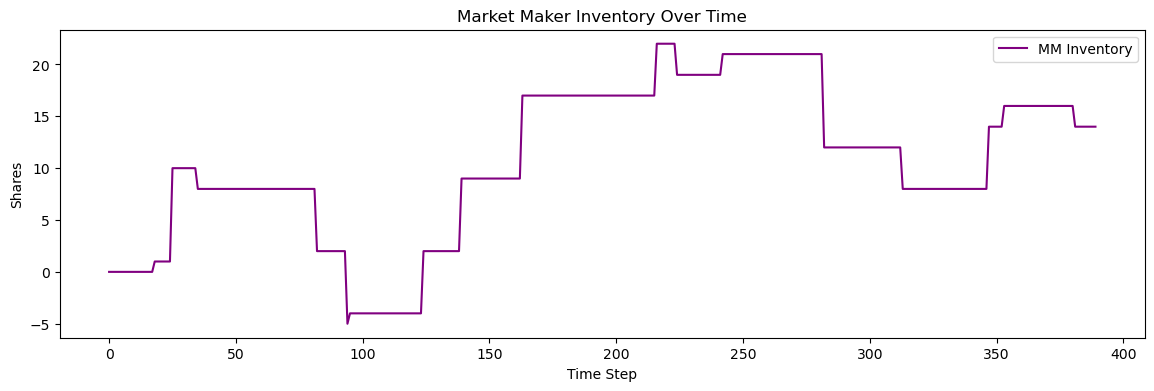

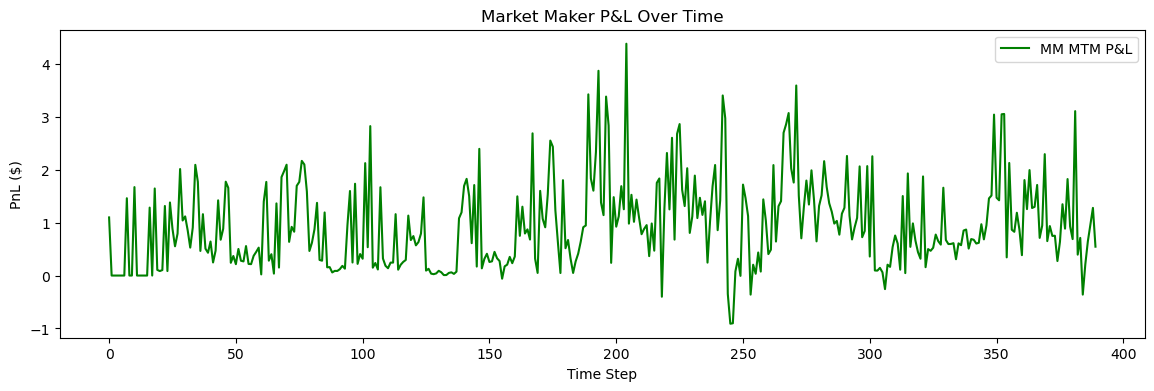

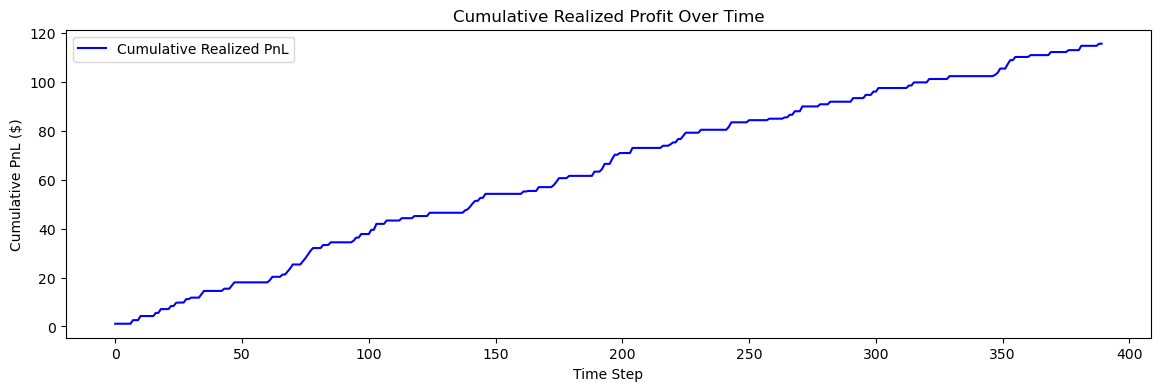

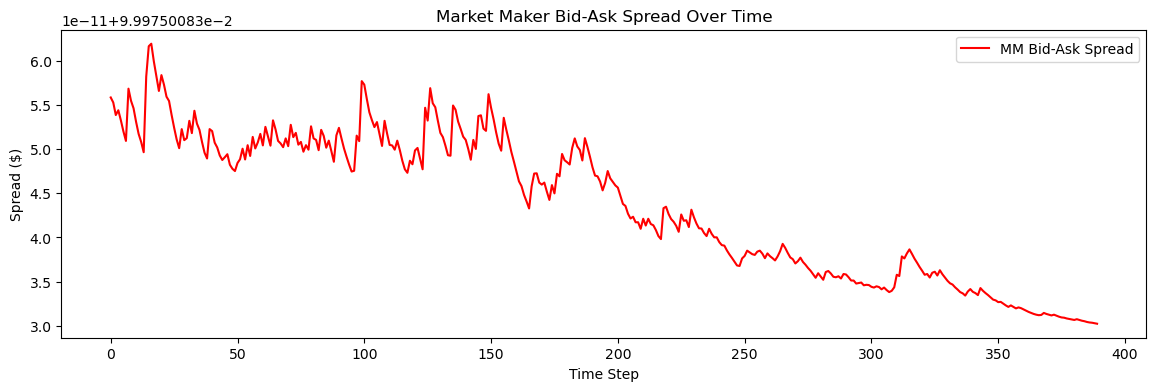

In [11]:
df_simple, order_book = run_simulation(T=390, S0=100, sigma=0.001, trade_qty=100, spread=0.01, cost_per_share=0.005, use_avellaneda=True, k=20, gamma=0.01)

plot_simulation(df_simple)


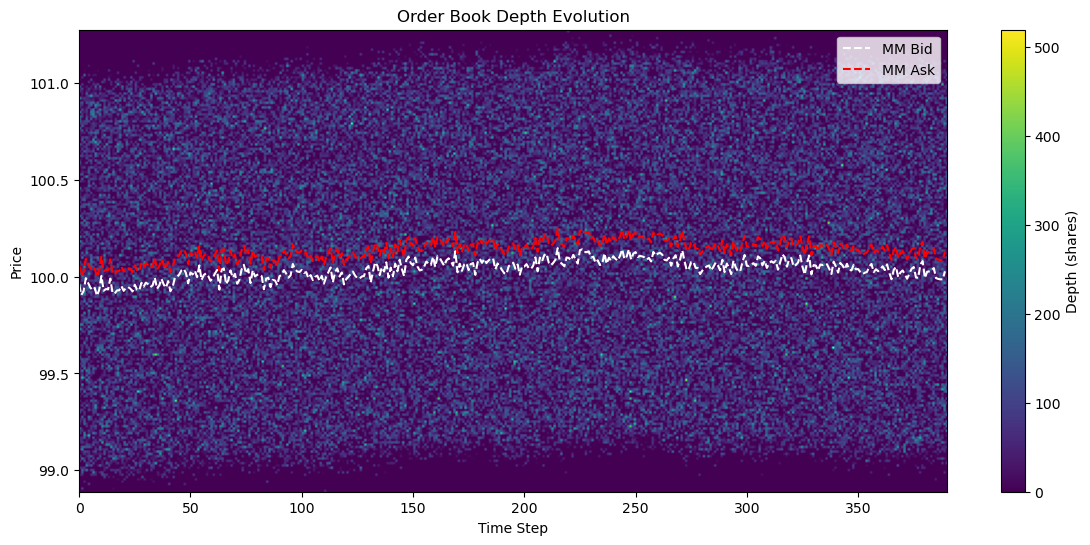

In [4]:
def plot_order_book_heatmap(order_book_history, price_range=None):
    import numpy as np
    import matplotlib.pyplot as plt

    # Collect price range
    if price_range is None:
        all_prices = [p for ob in order_book_history for (p, _) in (ob["bids"] + ob["asks"])]
        price_min, price_max = min(all_prices), max(all_prices)
    else:
        price_min, price_max = price_range

    price_levels = np.linspace(price_min, price_max, 200)   # discretized price grid
    depth_matrix = np.zeros((len(price_levels), len(order_book_history)))

    for t, ob in enumerate(order_book_history):
        for p, size in ob["bids"]:
            idx = np.argmin(np.abs(price_levels - p))
            depth_matrix[idx, t] += size
        for p, size in ob["asks"]:
            idx = np.argmin(np.abs(price_levels - p))
            depth_matrix[idx, t] += size

    plt.figure(figsize=(14,6))
    plt.imshow(depth_matrix, aspect='auto', cmap='viridis',
               extent=[0, len(order_book_history), price_min, price_max],
               origin='lower')
    plt.colorbar(label='Depth (shares)')
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.title("Order Book Depth Evolution")

    # overlay MM quotes
    mm_bids = [ob["mm_bid"] for ob in order_book_history]
    mm_asks = [ob["mm_ask"] for ob in order_book_history]
    plt.plot(range(len(order_book_history)), mm_bids, color="white", linestyle="--", label="MM Bid")
    plt.plot(range(len(order_book_history)), mm_asks, color="red", linestyle="--", label="MM Ask")
    plt.legend()
    plt.show()


plot_order_book_heatmap(order_book)